# Teste para Análise de Dados **senhasegura**

# 1 Introdução 
Este projeto tem como foco a análise de dados de vendas de uma loja online para o teste de Estágio em Dados da senhasegura, com objetivo principal de manipular os dados , realizar uma analise exploratoria e fazer um insight detalhado dos resultados obtidos.  

### 1.1- Objetivos Específicos 
- **Limpeza e Preparação dos Dados**: Será feita a verificacao de dados ausentes , como tambem edicao de alguns dados para melhor visualizacao.
- **Analise exploratoria dos Dados**: Será feita uma analise aprofundada para entendelos melhor e assim conseguir insights e resultados mais precisos.
- **Resultados e Analises Obtidos**: Ao final com todos os dados em maos sera feita uma analise aprofunda dos dados e assim feita algumas sugestoes de melhorias.

### 1.2- Ferramentas e Metodologia
- **Ferramentas Utilizadas**: Python e Jupyter Notebooks para análise de dados, com bibliotecas como Pandas, Plotly, Matplotlib e Seaborn para manipulação de dados e visualizações.
- **Abordagem de Análise**: A análise será conduzida através de uma combinação de estatísticas descritivas, visualizações de dados, e exploração de variáveis específicas que são potencialmente relevantes para o Teste.

Com esses objetivos e ferramentas em mente, procederemos com a análise detalhada dos dados fornecidos.

 ### 1.3- Importação das Bibliotecas
 
 Importação das bibliotecas necessárias.

In [1]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
import os
from datetime import datetime

#Cores a serem ultilizadas nos graficos 
colorsbar = ['#086365','#80b9b8']
color1 = ['#086365']
if not os.path.exists('imgs'):
    os.makedirs('imgs')
vendas=[]

### 2 - Limpeza e Preparcao dos Dados

Importação dos dados do arquivo csv para um dataframe do pandas.

In [2]:
data=pd.read_csv('dados_de_vendas.csv')

### 2.1- Descrição das Colunas do Conjunto de Dados

Este conjunto de dados contém algumas colunas que fornecem informações sobre as vendas. Abaixo está uma descrição breve de cada coluna:

- **ID da Venda**: Identificador único da venda
 - **Data da Venda**: Data da venda (formato: AAAA-MM-DD)
 - **Produto**: Nome do produto vendido
 - **Categoria**: Categoria do produto
 - **Preço Unitário**: Preço de venda de uma unidade do produto
 - **Quantidade**: Quantidade do produto vendida
 - **Cidade**: Cidade onde a venda foi realizada
 - **Estado**: Estado onde a venda foi realizada

### 2.2 - Verificacao da Quantidade de Dados e Atributos  

In [3]:
df = pd.read_csv('dados_de_vendas.csv')

# Obter a quantidade de linhas e colunas
num_linhas, num_colunas = df.shape

print(f"Número de linhas: {num_linhas}")
print(f"Número de colunas: {num_colunas}")

Número de linhas: 3000
Número de colunas: 8


Podemos observar que o conjunto de dados possui 3.000 linhas e 8 colunas, o que representa 3.000 vendas e 8 atributos que descrevem cada venda.

### 2.3 - Verificação de Valores Ausentes

In [4]:
missing_data = data.isnull().sum()
missing_data

ID da Venda       0
Data da Venda     0
Produto           0
Categoria         0
Preço Unitário    0
Quantidade        0
Cidade            0
Estado            0
dtype: int64

Ao realizar a limpeza dos dados, a primeira etapa essencial foi verificar se havia valores ausentes em alguma das colunas. Utilizando a função isnull() em conjunto com sum(), identifiquei que não havia valores ausentes no conjunto de dados fornecido. No entanto, gostaria de destacar o seguinte raciocínio para possíveis cenários onde os valores ausentes estivessem presentes:

- Exclusão de Linhas com Valores Ausentes: Se a quantidade de dados faltantes fosse pequena e concentrada em poucas linhas, a exclusão dessas linhas seria uma estratégia viável, já que o impacto sobre o volume total de dados seria insignificante.

- Substituição de Valores: Em situações onde a exclusão de linhas não seria ideal (por exemplo, se houvesse muitas lacunas), a substituição por valores apropriados seria considerada. Para variáveis numéricas, poderia ser usada a média ou a mediana, dependendo da distribuição dos dados, para não distorcer os resultados. No caso de colunas categóricas, o valor mais frequente poderia ser uma boa substituição.

Essas abordagens garantiriam que o dataset continuasse consistente e sem vieses, evitando a exclusão excessiva de dados relevantes ou a introdução de valores incorretos.



### 2.4 - Conversao da coluna "Data da Venda" para o formato apropriado

In [5]:


# Inicializar a lista de vendas
vendas = []

# Abrir e ler o arquivo CSV
with open('dados_de_vendas.csv', mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Converter 'Data da Venda' de string para objeto de data
        row['Data da Venda'] = datetime.strptime(row['Data da Venda'], '%Y-%m-%d')

        # Adicionar a venda à lista
        vendas.append(row)

A coluna "Data da Venda" foi inicialmente importada como string, o que impede uma análise temporal precisa. Para corrigir isso, converti essa coluna para o formato datetime, utilizando a função datetime.strptime(). A conversão permitiu realizar análises temporais, como a evolução das vendas ao longo dos meses, facilitando o agrupamento por períodos (ano, mês, etc.) e a identificação de tendências sazonais.

Essa conversão foi fundamental para realizar a análise correta de vendas mensais e sazonais, possibilitando o cálculo preciso de métricas como "valor total por mês" e "picos de vendas", insights cruciais para qualquer análise temporal.

## 3 - Análise Exploratória dos Dados

### 3.1 - Calculo do valor total de cada venda 

In [6]:
for venda in vendas:
    # Converter 'Preço Unitário' e 'Quantidade' para os tipos numéricos corretos
    venda['Preço Unitário'] = float(venda['Preço Unitário'])
    venda['Quantidade'] = int(venda['Quantidade'])
    
    # Agora realizar a multiplicação corretamente
    venda['Valor Total'] = venda['Preço Unitário'] * venda['Quantidade']
  

Para calcular o valor total de cada venda, multipliquei o "Preço Unitário" pela "Quantidade" de produtos vendidos. Isso nos dá uma métrica essencial para avaliar o impacto financeiro de cada transação. Esse cálculo é particularmente importante para entender melhor a receita total gerada por produto, categoria e cidade, fornecendo uma visão mais detalhada das áreas de maior rentabilidade para a loja

### 3.2 - Produto mais vendido 
Foquei em identificar o produto mais vendido e a categoria com maior receita porque essas métricas são cruciais para entender quais itens têm maior demanda e quais geram mais receita para o negócio. Saber que o produto "Moletom" foi o mais vendido e que a categoria "Roupas" domina a receita ajuda a definir estratégias de estoque, marketing e vendas.

- Produto mais vendido: Saber qual produto é o mais popular permite à empresa planejar seu estoque de forma mais eficiente, garantindo que não haja falta de um item de alta demanda.





In [7]:
produtos_vendidos = {}
for venda in vendas:
    produto = venda['Produto']
    produtos_vendidos[produto] = produtos_vendidos.get(produto, 0) + venda['Quantidade']

produto_mais_vendido = max(produtos_vendidos, key=produtos_vendidos.get)
print(f"Produto mais vendido: {produto_mais_vendido}")

Produto mais vendido: Moletom


- Categoria com maior receita: Identificar a categoria com maior receita (Roupas) mostra onde a loja deve continuar investindo, e sugere que outras categorias, como "Calçados", podem ser áreas de oportunidade para crescimento ou diversificação.

In [13]:
# Categoria de produto com maior receita total
receita_por_categoria = {}
for venda in vendas:
    categoria = venda['Categoria']
    receita_por_categoria[categoria] = receita_por_categoria.get(categoria, 0) + venda['Valor Total']

categoria_maior_receita = max(receita_por_categoria, key=receita_por_categoria.get)
print(f"Categoria com maior receita: {categoria_maior_receita}")

Categoria com maior receita: Roupas


Aqui notamos que a categoria com maior receita foi Roupas 

### 3.4 - Media de gasto por venda em cada cidade

In [9]:
total_por_cidade = {}
vendas_por_cidade = {}

for venda in vendas:
    cidade = venda['Cidade']
    total_por_cidade[cidade] = total_por_cidade.get(cidade, 0) + venda['Valor Total']
    vendas_por_cidade[cidade] = vendas_por_cidade.get(cidade, 0) + 1

media_gasto_cidade = {cidade: total_por_cidade[cidade] / vendas_por_cidade[cidade] for cidade in total_por_cidade}
print(f"{'Cidade':<15}{'Média de Gasto':<15}")
print("-" * 30)
for cidade, media in media_gasto_cidade.items():
    print(f"{cidade:<15}{media:<15.2f}")

Cidade         Média de Gasto 
------------------------------
Rio de Janeiro 356.88         
Porto Alegre   325.17         
Goiânia        334.95         
Curitiba       326.23         
Salvador       312.99         
Manaus         314.80         
Belo Horizonte 323.90         
Fortaleza      338.71         
Recife         320.61         
São Paulo      324.46         


In [10]:
status_count = data['Cidade'].value_counts()
status_count

Cidade
Curitiba          328
Manaus            324
Porto Alegre      311
Goiânia           305
São Paulo         300
Salvador          297
Fortaleza         296
Rio de Janeiro    285
Belo Horizonte    277
Recife            277
Name: count, dtype: int64

Calcular a média de gasto por cidade nos deu uma visão geográfica do desempenho das vendas. A decisão de focar nessa métrica foi baseada na possibilidade de personalizar campanhas de marketing ou promoções para diferentes regiões. Ao observar que o Rio de Janeiro tem o maior ticket médio, é possível direcionar produtos premium ou promoções exclusivas para essa cidade, enquanto para Curitiba (com maior volume de compras), estratégias de fidelização podem ser mais eficazes.

### 3.5 - Gráfico de Barra

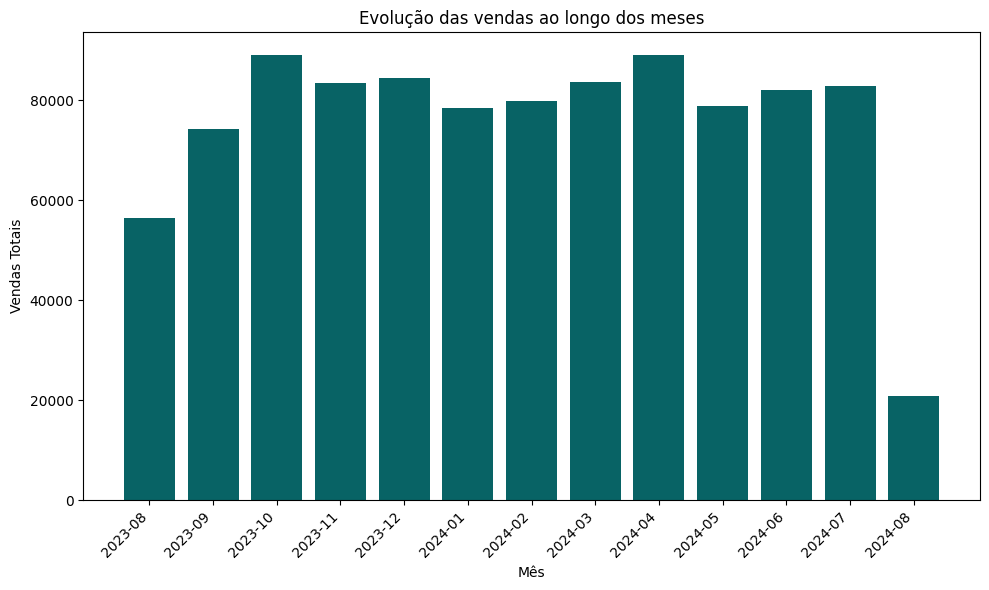

In [11]:
# Vamos garantir que vendas_por_mes seja um dicionário
vendas_por_mes = {}

# Agrupar vendas por mês e ano
for venda in vendas:
    ano_mes = (venda['Data da Venda'].year, venda['Data da Venda'].month)
    vendas_por_mes[ano_mes] = vendas_por_mes.get(ano_mes, 0) + venda['Valor Total']

# Ordenar as vendas por ano e mês
vendas_por_mes_ordenado = dict(sorted(vendas_por_mes.items(), key=lambda x: (x[0][0], x[0][1])))

# Preparar os rótulos e valores para o gráfico
meses_ordenados = [f"{ano}-{mes:02d}" for ano, mes in vendas_por_mes_ordenado.keys()]
valores_ordenados = vendas_por_mes_ordenado.values()

# Criar gráfico de barras com meses ordenados
plt.figure(figsize=(10, 6))
plt.bar(meses_ordenados, valores_ordenados, color=color1)
plt.xlabel('Mês')
plt.ylabel('Vendas Totais')
plt.title('Evolução das vendas ao longo dos meses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Na análise temporal, observei picos em outubro e abril, bem como uma queda acentuada em agosto. Esses padrões sugerem a presença de fatores sazonais ou campanhas promocionais que afetaram o comportamento do consumidor. Minha escolha de focar nesses meses foi estratégica:

Picos em outubro e abril: Podem estar associados a eventos sazonais (como Black Friday ou promoções de meia estação). Recomendo que a empresa analise as campanhas realizadas nesses períodos para identificar o que funcionou bem e replicar estratégias semelhantes no futuro.

Queda em agosto: A queda em agosto exige uma investigação mais profunda. Isso pode indicar uma sazonalidade negativa ou uma falha em investir em campanhas promocionais. Uma análise mais detalhada de dados históricos e benchmarking com outras empresas poderia esclarecer as causas dessa queda.

### 3.6 Gráfico de Pizza 

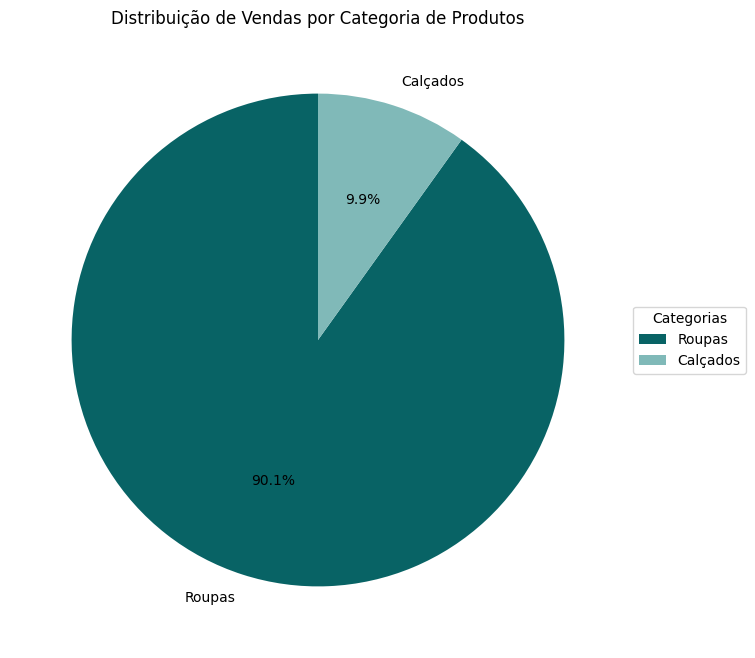

In [12]:
# Contagem dos produtos por categoria
counts = data['Categoria'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colorsbar)
plt.legend(counts.index, title="Categorias", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribuição de Vendas por Categoria de Produtos')
plt.show()

Grafico de pizza onde podemos ver que teve uma maior venda na categoria de roupas do que calçados 

## 4 - Conclusões

### 4.1 - Insights

### 4.1.1 - Comportamento das Vendas ao Longo do Tempo: 

 Analisando os dados obtidos no processo podemos notar alguns comportamentos em realação as vendas: 
 
- As vendas mantiveram um comportamento estável entre setembro de 2023 e junho de 2024, com picos notáveis em outubro de 2023 e abril de 2024. Esses picos podem estar relacionados a campanhas promocionais ou sazonalidades, como eventos de Black Friday ou promoções de primavera.

- É importante investigar mais a fundo esses picos para entender quais fatores exatos os influenciaram, como campanhas de marketing, eventos específicos ou lançamento de novos produtos.

- A queda acentuada nas vendas em agosto, observada em dois anos consecutivos, pode indicar uma sazonalidade natural ou, possivelmente, um baixo investimento em promoções durante esse período. Uma análise mais detalhada, incluindo comparações com outros setores de varejo online, pode ajudar a entender melhor esse padrão.

- A quantidade media de vendas entre as cidades e de 3 produtos. 

### 4.1.2 - Produto e categoria com Melhor Desempenho : 

 Durante o periodo de vendas foram notados alguns pontos : 

- O produto Moletom foi o mais vendido, sugerindo uma forte demanda por essa categoria de vestuário casual. Esse resultado poderia ser cruzado com dados externos, como tendências de moda ou influências climáticas em diferentes regiões do país.

- A categoria Roupas representa mais de 90% da receita total, destacando que a loja está fortemente posicionada nesse nicho. No entanto, uma análise mais detalhada de subcategorias dentro de "Roupas" ajudaria a identificar possíveis áreas de crescimento.

- A categoria Calçados, que representa menos de 10% do total de vendas, merece atenção. Uma análise mais detalhada poderia explorar a oferta atual de produtos e verificar se há oportunidade para reposicionamento ou melhorias no mix de produtos.

### 4.1.3 - Analise Geografica das Vendas: 

 Analisando as cidades e estados , temos os seguintes insights : 

- O Rio de Janeiro apresentou o maior ticket médio (R$ 356,88), sugerindo que essa cidade tem um público disposto a gastar mais por transação. Seria interessante cruzar esse dado com informações socioeconômicas e demográficas para criar campanhas mais direcionadas a esse perfil de cliente.

- Curitiba, apesar de ter um ticket médio mais baixo, foi a cidade com o maior número de compras. Isso sugere que Curitiba é um mercado com volume alto, mas de menor valor unitário. Estratégias de fidelização e promoções de compra recorrente podem ser eficazes para aumentar o ticket médio nessa região.

## 4.2 - Recomendações 

- **Campanhas Sazonais e Promoções Direcionadas:** Os picos de vendas em outubro e abril podem ser explorados com campanhas promocionais sazonais, aproveitando a possível relação com datas comemorativas ou eventos comerciais. Uma análise mais detalhada de vendas mensais de anos anteriores ajudaria a confirmar essa hipótese. Para combater a queda nas vendas em agosto, recomendo testar novas estratégias promocionais, como liquidações de estoque ou introdução de novos produtos. Campanhas de e-mail marketing com foco em clientes recorrentes podem ajudar a mitigar essa queda.

- **Diversificação do Portfólio de Produtos:** A loja deve continuar a investir na categoria de Roupas, que representa a maior parte das vendas. No entanto, é importante diversificar o portfólio e explorar a categoria de Calçados, possivelmente através de parcerias com novas marcas ou promoções agressivas para aumentar a participação desse segmento. Recomendo também uma análise mais detalhada da concorrência nesse nicho para identificar lacunas de mercado.

- **Foco em Cidades com Alto Potencial de Gastos:** O Rio de Janeiro, com o maior ticket médio, é um mercado promissor para lançamentos de produtos premium e campanhas específicas para consumidores de alto poder aquisitivo. A loja pode investir em campanhas de marketing digital direcionadas a essa região, focando em produtos de maior valor agregado. Curitiba, com maior volume de vendas, deve ser foco de campanhas que incentivem compras recorrentes e de valor mais elevado. Promoções como "leve 4, pague 3" ou programas de fidelidade podem ser uma boa estratégia para aumentar o ticket médio nessa cidade.

- **Aprofundar a Investigação em Meses de Queda:** A queda nas vendas em agosto deve ser investigada mais profundamente, considerando tanto fatores internos (como falta de promoções ou campanhas de marketing) quanto externos (sazonalidade, comportamento do consumidor). Uma análise comparativa com outras empresas do setor ou com dados de mercado mais amplos ajudaria a identificar a causa e planejar ações para mitigar esse impacto.